<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WEEK2_DESCRIPTIVE_STATISTICS/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_08_Wambui_Kahuthu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank usage

## Defining the Question

### a. Specifying the data analytic question

### b. Defining the metric for success

### c. Understanding the context

info on the topic

### d. Recording the experimental design

methodology ya analysis eg crisp dm

### e. Data relevance

appropriateness of avaliable data to the research question

## 2. Loading Our Libraries

In [53]:
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

## 3. Reading the Data

In [54]:
# Loading csv file from the given url http://bit.ly/FinancialDataset

financial_df = pd.read_csv('http://bit.ly/FinancialDataset')

## 4. Checking the Data

In [55]:
# Previewing the top of our dataset

financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [56]:
# Previewing the bottom of our dataset

financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [57]:
# Checking general information of the dataframe

financial_df.info()

# Displays number of entries and columns, column names, number of non-null values in every column, data types of each column, distribution of each data type and memory usage of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 5. External Data Source Validation

At this point we compare our data set with 

## 6. Cleaning the Data

In [58]:
# Checking for null values

financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [59]:
# Dealing with the missing values
# 
financial_df = financial_df.dropna()

In [60]:
# Determining the sum of duplicated values
financial_df.duplicated().sum().sum()

0

In [61]:
# Standardizing column names
# Removing white spaces, lowering the case, replacing spaces with _, and removing brackets 
financial_df.columns = financial_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Renaming some column names
financial_df.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'location', 'cell_phone_access' : 'phone', 'respondent_age':'age', 'gender_of_respondent':'gender', 'the_relathip_with_head' : 'relationship_with_head', 'level_of_educuation' : 'education_level'}, axis=1, inplace=True)

# Dispalying the column names
financial_df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location', 'phone',
       'household_size', 'age', 'gender', 'relationship_with_head',
       'marital_status', 'education_level', 'type_of_job'],
      dtype='object')

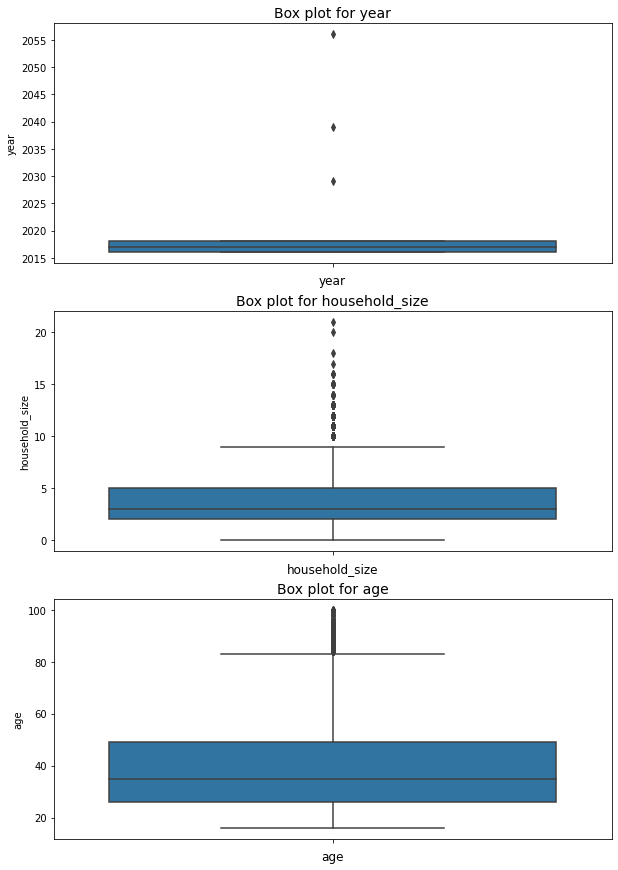

In [62]:
# Checking for Outliers
col_names= ['year', 'household_size', 'age',]

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=financial_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for {}'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)

Outliers in the 'year' column may indicate a data entry error as the years data collection in the different countries are from 2016 to 2018; therefore we will remove them. In as much as the outliers in 'age' and 'household_size' columns may be due to the diversity of the respondents, they will tremendously affect the means, variances, and skewness of the variables; therefore we will remove them too. 

In [63]:
# Removing outliers
Q1 = financial_df.quantile(0.25)
Q3 = financial_df.quantile(0.75)
IQR = Q3 - Q1
financial_df = financial_df[~((financial_df < (Q1 - 1.5 * IQR)) | (financial_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Checking for anomalies in the columns with categorical variables

In [100]:
# Finding out the unique values in 'age' column
financial_df['age'].unique()

array([24., 70., 26., 34., 32., 42., 54., 76., 40., 69., 64., 31., 38.,
       47., 27., 48., 25., 21., 18., 22., 58., 55., 62., 29., 35., 45.,
       67., 19., 80., 66., 50., 33., 28., 51., 16., 17., 30., 37., 59.,
       65., 46., 56., 52., 43., 49., 44., 72., 53., 63., 39., 81., 78.,
       36., 20., 60., 23., 71., 57., 68., 41., 61., 75., 73., 74., 77.,
       82., 79., 83.])

The 'age' column has no anomaly

In [102]:
# Finding out the unique values in 'household_size' column
financial_df['household_size'].unique()

array([3., 5., 8., 7., 1., 6., 4., 2., 9., 0.])

0 is an anomaly in the 'house_hold' size column

In [105]:
# Finding out the number of recors with '0' as the household_size
financial_df[(financial_df['household_size']==0)].shape

(27, 12)

Since 27 is a very small number compared to the total number of records, we can remove the records with '0' in the 'household_size' column in order to have an anomaly free dataset while still maintaining the quality of the data

In [106]:
# Dropping the entries with '0' in 'household_size' column
financial_df.drop(financial_df.index[financial_df['household_size'] == 0], inplace = True)

In [64]:
# Finding out the unique values in the 'Country' column
financial_df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

The 'country' column has no anomaly


In [65]:
# Finding out the unique values in 'bank_account' column
financial_df['bank_account'].unique()


array(['Yes', 'No'], dtype=object)

The 'bank_account' column has no anomaly

In [66]:
# Finding out the unique values in 'location' column
financial_df['location'].unique()

array(['Rural', 'Urban'], dtype=object)

The 'location' column has no anomaly

In [67]:
# Finding out the unique values in 'phone' column
financial_df['phone'].unique()

array(['Yes', 'No'], dtype=object)

The 'phone' column has no anomaly

In [68]:
# Finding out the unique values in 'gender' column
financial_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

The 'gender' column has no anomaly

In [69]:
# Finding out the unique values in 'relationship_with_head' column
financial_df['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

The 'relationship_with_head' column has no anomaly

In [70]:
# Finding out the unique values in 'marital_status' column
financial_df['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

The 'marital_status' column has no anomaly

In [71]:
# Finding out the unique values in 'education_level' column
financial_df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

'6' seems to be an anomaly in the 'education_level' column

In [72]:
# Finding out the number of entries with '6' in the 'education_level' 
financial_df[(financial_df['education_level']=='6')].shape

(25, 13)

Since 25 is a very small number compared to the total number of records, we can remove the records with '6' in the 'education_level' column in order to have an anomaly free dataset while still maintaining the quality of the data

In [73]:
# Dropping the entries with '6' in 'education_level' column
financial_df.drop(financial_df.index[financial_df['education_level'] == '6'], inplace = True)

In [74]:
# Finding out the unique values in 'gender' column
financial_df['type_of_job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

The 'type_of_job' column has no anomaly

In [75]:
# Dropping irrelevant columns
financial_df.drop(['year'], axis=1, inplace=True)

In [107]:
# Finding the number of records remaining after cleaning
financial_df.shape

(22673, 12)

## 7. Exploratory Analyses

### a. Univariate analysis

#### i. Categorical variables

#### Recommendation for effectively performing univariate analysis while working on the current problem.

The objective of the study is to find how we can predict which individuals are most likely to have or use a bank account. While conducting univariate analyses on categorical variables, we will investigate the usage of bank accounts by individuals depending on their level of education. This will give us insights into how an individual's level of education might drive his/her financial outcomes. The univariate analyses could be done using any of the other variables, e.g. type of job, age, gender of respondent, country, etc. 




Understanding the individuals from whom data was collected

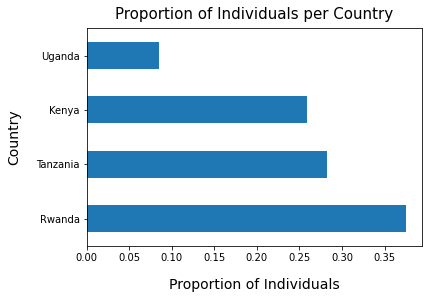

In [113]:
# Creating a bar chart for the proportion of count of values in 'country' column

#plotting a bar graph
(financial_df['country'].value_counts(normalize=True)).plot.barh()

# labelling and formatting bar chart 
plt.title('Proportion of Individuals per Country', fontsize=15, y=1.015)
# labelling and formatting x axis 
plt.xlabel('Proportion of Individuals', fontsize=14, labelpad=15)
# labelling and formatting y axis
plt.ylabel('Country', fontsize=14, labelpad=15)
#display bar chart
plt.show()

37.47% of the individuals were from Rwanda, 28.20% from Tanzania, 25.88% from Kenya, and 8.45% from Uganda 

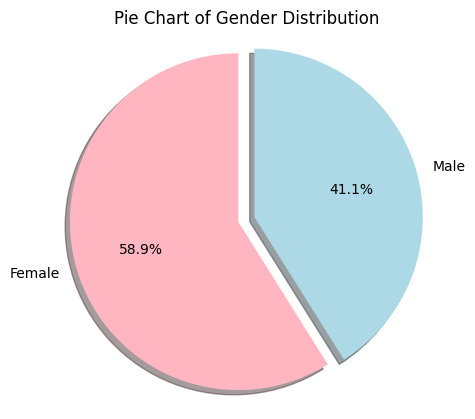

In [114]:
# Creating a pie chart of the percentage of count of values in 'gender' column

# Finding the count of values of the elements in 'bank_account' column
gender = financial_df.gender.value_counts()
gender

# Assigning the colums to 'element' and 'size' variables
element = gender.values
size = gender.index

# Specifying the colors of the pie chart
colors = ['lightpink', 'lightblue']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Gender Distribution')
plt.show()

58.9% of respondents were female and 41.1% were male

Let us find the overall usage of commercial banks by individuals in the sample population

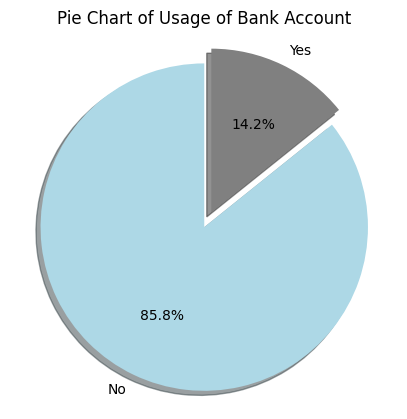

In [115]:
# Creating a pie chart of the percentage of count of values in 'bank_account' column

# Finding the count of values of the elements in 'bank_account' column
bank_usage = financial_df.bank_account.value_counts()
bank_usage

# Assigning the colums to 'element' and 'size' variables
element = bank_usage.values
size = bank_usage.index

# Specifying the colors of the pie chart
colors = ['lightblue', 'gray']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Usage of Bank Account')
plt.show()


Information prior to this analysis indicated that about 13.9% of the adult population in Kenya, Uganda, Tanzania and Rwanda have access to or use a commercial bank account. Our findings show that only 14.2% of the population sample have access to or use a commercial bank account. The difference is only 0.3% meaning that this sample can almost accurately represent the population.

Let us find the proportion of bank usage of the individuals per level of education

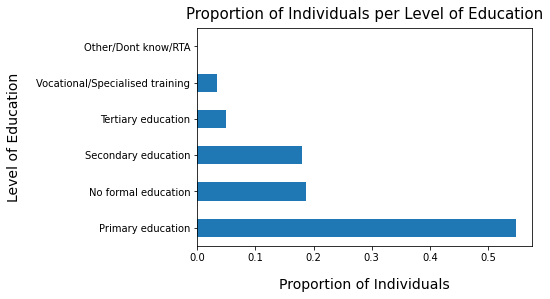

In [116]:
# Creating a bar chart for the proportion of count of values in 'education_level' column

#plotting a bar graph
(financial_df['education_level'].value_counts(normalize=True)).plot.barh()

# labelling and formatting bar chart 
plt.title('Proportion of Individuals per Level of Education', fontsize=15, y=1.015)
# labelling and formatting x axis 
plt.xlabel('Proportion of Individuals', fontsize=14, labelpad=15)
# labelling and formatting y axis
plt.ylabel('Level of Education', fontsize=14, labelpad=15)
#display bar chart
plt.show()

The analysis shows that the highest level of education for a majority of the individuals (54.82%) is primary education, followed by no formal education (18.63%), secondary education (18.07%), tertiary education (5%), vocational/specialised training (3.46%) and lastly 0.03 of the individuals fall under others/don't know/RTA

In the following univariate analyses of categorical variables, we will analyse the usage of commercial bank accounts based the levels of education of the individuals in the sample population

In [117]:
# Creating a dataframe of individuals with secondary education as highest level of education
secondary = financial_df[(financial_df['education_level']=='Secondary education')]

# Creating a dataframe of individuals with no formal education as highest level of education
no_formal = financial_df[(financial_df['education_level']=='No formal education')]

# Creating a dataframe of individuals with vocational/specialized training as highest level of education
specialized_training = financial_df[(financial_df['education_level']=='Vocational/Specialised training')]

# Creating a dataframe of individuals with primary education as highest level of education
primary = financial_df[(financial_df['education_level']=='Primary education')]

# Creating a dataframe of individuals with tertiary education as highest level of education
tertiary = financial_df[(financial_df['education_level']=='Tertiary education')]

# Creating a dataframe of individuals with other/unkown/RTA as highest level of education
other = financial_df[(financial_df['education_level']=='Other/Dont know/RTA')]

In [122]:
# Creating a frequency table for proportion of bank usage among individuals with other/unkown/RTA as highest level of education
other.bank_account.value_counts(normalize=True)

Yes    1.0
Name: bank_account, dtype: float64

Out of the 0.03% of the individuals in the population with other/unknown/RTA as their highest level of education, 100% percent of them are likely to have a bank account 

In [123]:
# Creating a frequency table for proportion of bank usage among individuals with no formal as highest level of education
no_formal.bank_account.value_counts(normalize=True)

No     0.961893
Yes    0.038107
Name: bank_account, dtype: float64

Out of the 18.63% of the individuals in the population with no formal education as their highest level of education, only 3.81% percent of them are likely to have a bank account, and 96.19% of them are likely to not have a bank account

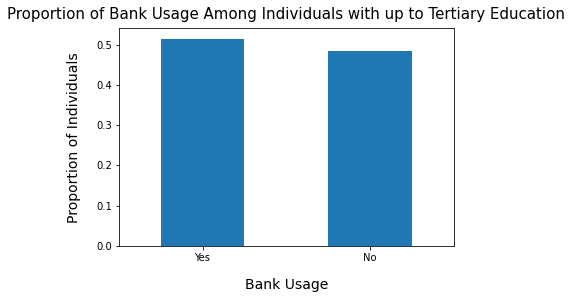

In [84]:
# Creating a bar chart for proportion of bank usage among individuals with tertiary education as highest level of education
(tertiary['bank_account'].value_counts(normalize=True)).plot.bar()

# labelling and formatting bar chart 
plt.title('Proportion of Bank Usage Among Individuals with up to Tertiary Education', fontsize=15, y=1.015)
# labelling and formatting x axis 
plt.xlabel('Bank Usage', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# labelling and formatting y axis
plt.ylabel('Proportion of Individuals', fontsize=14, labelpad=15)
#display bar chart
plt.show()

Out of the 5% of the individuals in the population with tertiary education as their highest level of education, 51.59% percent of them are likely to have a bank account while  48.41% of them are likely to not have a bank account

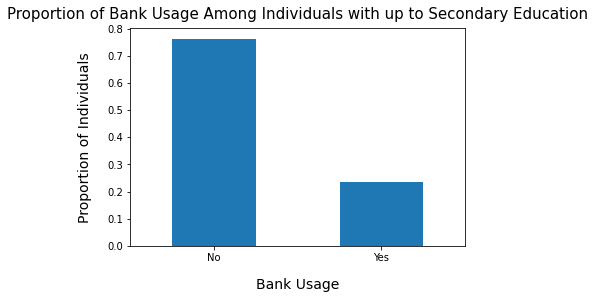

In [85]:
# Creating a bar chart for proportion of bank usage among individuals with secondary education as highest level of education
(secondary['bank_account'].value_counts(normalize=True)).plot.bar()

# labelling and formatting bar chart 
plt.title('Proportion of Bank Usage Among Individuals with up to Secondary Education', fontsize=15, y=1.015)
# labelling and formatting x axis 
plt.xlabel('Bank Usage', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# labelling and formatting y axis
plt.ylabel('Proportion of Individuals', fontsize=14, labelpad=15)
#display bar chart
plt.show()


Out of the 18.07% of the individuals in the population with secondary education as their highest level of education, only 23.63% percent of them are likely to have a bank account while 76.36% of them are likely to not have a bank account

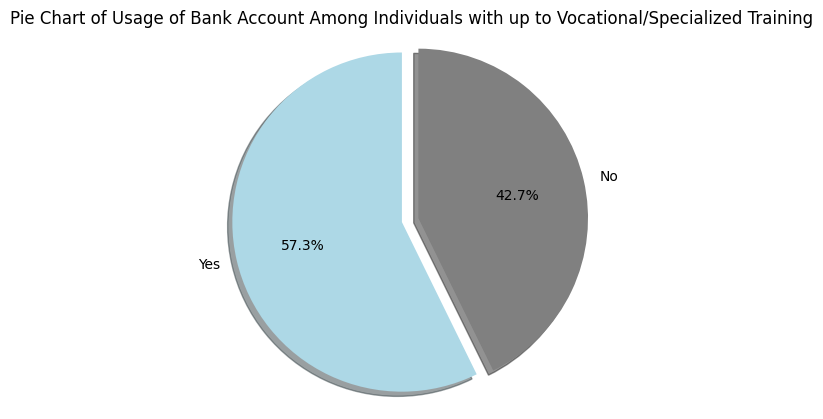

In [129]:
# Creating a pie chart of the percentage of bank usage among idividuals with vocational/specialized training as their highest level of education

# Finding the count of values of the elements in 'bank_account' column
bank_usage = specialized_training.bank_account.value_counts()
bank_usage

# Assigning the colums to 'element' and 'size' variables
element = bank_usage.values
size = bank_usage.index

# Specifying the colors of the pie chart
colors = ['lightblue', 'gray']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Usage of Bank Account Among Individuals with up to Vocational/Specialized Training')
plt.show()

Out of the 3.46% of the individuals in the population with vocational/specialized training as their highest level of education, 57.3% percent of them are likely to have a bank account while 42.7% are likely to not have a bank account

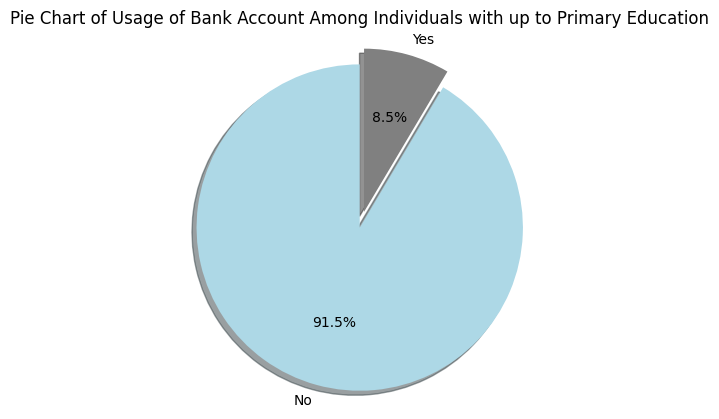

In [130]:
# Creating a pie chart of the percentage of bank usage among idividuals with primary education training as their highest level of education

# Finding the count of values of the elements in 'bank_account' column
bank_usage = primary.bank_account.value_counts()
bank_usage

# Assigning the colums to 'element' and 'size' variables
element = bank_usage.values
size = bank_usage.index

# Specifying the colors of the pie chart
colors = ['lightblue', 'gray']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Usage of Bank Account Among Individuals with up to Primary Education')
plt.show()

Out of the 54.82% of the individuals in the population with primary education as their highest level of education, only 8.5% percent of them are likely to have a bank account while 91.5% are likely to not have a bank account

#### ii. Numerical variables

Univariate analysis of numerical variables will help us understand the individuals in the sample population better     
Our numerical variables are household_size and age

##### Measures of central tendency




###### Age

In [132]:
# Finding the mean age of individuals in the sample population
financial_df['age'].mean()

38.32677634190447

The mean age of the individuals in the sample population is 38.33

In [133]:
# Finding the modal age of individuals in the sample population
financial_df['age'].mode()


0    30.0
dtype: float64

The modal age of the individuals in the sample population is 30

In [134]:
# Finding the median age of individuals in the sample population
financial_df['age'].median()

35.0

The median age of the individuals in the sample population is 35

###### Household size

In [135]:
# Finding the mean household size of individuals in the sample population
financial_df['household_size'].mean()

3.5841309046001855

The mean of the household size of the individulas in the sample population is 3.58

In [136]:
# Finding the modal household size of individuals in the sample population
financial_df['household_size'].mode()

0    2.0
dtype: float64

The modal household size of the individuals in the sample population is 2

In [137]:
# Finding the median household size of individuals in the sample population
financial_df['household_size'].median()

3.0

The median household size of the individuals in the sample pupulation is 3

##### Measures of dispersion

###### Age

In [157]:
# Calculating the standard deviation
financial_df['age'].std()

15.786798363248979

A standard deviation of 15.79 indicates that the values are moderately close to the mean

In [158]:
# Calculating the variance 
financial_df['age'].var()

249.22300256188063

A variance of 249.22 means that values are dispersed


In [159]:
# Calculating the range
max_age = financial_df['age'].max()
min_age = financial_df['age'].min()

max_age - min_age

67.0

The range value shows length/difference between the maximum age and the minimum age is 67

In [161]:
# Calculating the quantiles 
financial_df['age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: age, dtype: float64

The quatile values indicate that25% of the values fall below 26, 50% of the values fall below and above 35, and 75% of the values fall below 48

In [162]:
# Calculating the interquatile range
Q3 = financial_df['age'].quantile(0.75)
Q1 =financial_df['age'].quantile(0.25)

Q3-Q1

22.0

The range between the middle 50% of the values is 22

In [163]:
# Calculating the skewness 
financial_df['age'].skew()

0.7409568877240711

0.74 skewness means that the tail on the right side is longer than on the left side and that the mean is greater than the mode

In [164]:
# Calculating the kurtosis
financial_df['age'].kurt()

-0.23371796802058498

-0.23 kurtosis means that the distribution has thinner tails than in a normal distribution has fewer values in is shorter tails

###### Household size 

In [165]:
# Calculating the standard deviation
financial_df['household_size'].std()

2.078044253802465

A standard deviation of 2.07 indicates that the values are close to the mean

In [166]:
# Calculating the variance
financial_df['household_size'].var()

4.3182679207614445

A variance of 4.31 means that the values are not so spread out from one another

In [168]:
# Calculating the range
max_household_size = financial_df['household_size'].max()
min_household_size = financial_df['household_size'].min()

max_household_size - min_household_size

8.0

The range value shows that the length/difference between the maximum value of and minimum value of household size is 8

In [169]:
# Calculating the quantiles
financial_df['household_size'].quantile([0.25, 0.5, 0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

The quatiles values indicate that 25% of the values fall below 2, 50% of the values fall below and above 3, and 75% of the values fall below 5 

In [171]:
# Calculating the interquantile range
Q3 = financial_df['household_size'].quantile(0.75)
Q1 = financial_df['household_size'].quantile(0.25)

Q3-Q1

3.0

The range between the middle 50% of the values is 3

In [172]:
# Calculating the skewness
financial_df['household_size'].skew()

0.6089019273573075

0.61 skewness means that the tail on the right side is longer than on the left side and that the mean is greater than the mode

In [173]:
# Calculating the kurtosis
financial_df['household_size'].kurt()

-0.5056159678414698

-0.51 kurtosis means that the distribution has thinner tails than in a normal distribution has fewer values in is shorter tails

##### Visualizations of distributions of numerical variables

###### Age

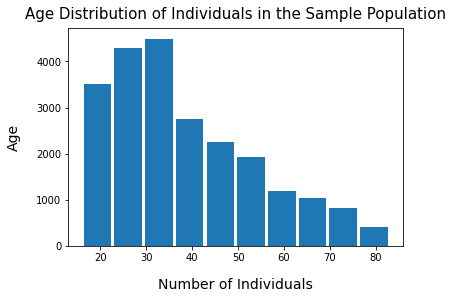

In [146]:
# Creating a histogram to visualize the age distribution of individuals in the sample population

# Assigning the age column to variable ages
ages = financial_df['age']

# plotting a histogram
plt.hist(ages, bins=10, histtype='bar', rwidth=0.9)
# labelling and formatting the x axis
plt.xlabel('Number of Individuals', fontsize=14, labelpad=15)
# labelling and formatting the y axis
plt.ylabel('Age', fontsize=14, labelpad=15)
# labelling and formatting the title
plt.title('Age Distribution of Individuals in the Sample Population', fontsize=15, y=1.015)
# displaying the histogram
plt.show()

The right-skewed histogram shows that the mode of the ages of the individuals in the sample population is closer to the left of the graph and smaller than the mean or/and the median and the mean is greater than the median or/and the mode

###### Household size

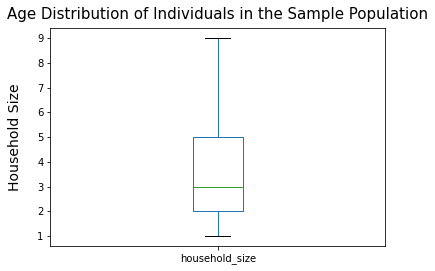

In [156]:
# Creating a box plot to visualize the distribution of household size of the individuals in the sample population

# Plotting the boxplot
financial_df.boxplot(['household_size'], grid=False)
# labelling and formatting the y axis
plt.ylabel('Household Size', fontsize=14, labelpad=15)
# labelling and formatting the title
plt.title('Age Distribution of Individuals in the Sample Population', fontsize=15, y=1.015)
# displaying the histogram
plt.show()

The box plot shows that the minimum household size is 1, the maximum is 9, 25% of the household sizes fall below 2, 25% of the household sizes fall above 5 and the median household size is 3


### b. Bivariate analysis

#### i. Numerical to numerical

Text(0.5, 1.0, 'Pearson Correlation ')

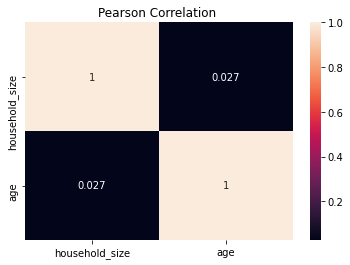

In [174]:
#Calculating pearson correlation of numerical variables
pearson_corr = with_account.corr()

# Plotting a correlation heat map
sns.heatmap(pearson_corr, xticklabels=pearson_corr.columns, yticklabels=pearson_corr.columns, annot=True)

plt.title('Pearson Correlation ')

A pearson coefficient of 0.027 means that household size and age of respondents have no correlation.  

### c. Multivariate analysis

## 8. Implementing the Solutions

## 9. Challenging the Solution

Insights 

## 10. Follow up Questions 